# Online retail II Data analysis

## Contexte
Analyse des transactions e-commerce d'un détaillant Britanique entre 2010 et 2011.

Objectifs: explorer et visualiser les données pour identifier les tendances et insights clés.

## Stack technique
- Python (pandas, matplotlib, seaborn)
- Power BI (Visunalisation finale)

## Étapes
1. **Data Cleaning & Exploration**:
- Import des données
- Vérification des valeurs manquantes
- Nettoyage des données
- Exportation du fichier nettoyé

2.**Visualisation**
- Graphique exploratoire en python.
- Visualisation Power BI


# 📦 **Chargement et préparation des données**
Dans cette section, nous chargeons le fichier CSV contenant les données `Online Retail II` et faisons un premier aperçu des données grâce à des statistiques descriptives et informations de base.

In [1]:
import pandas as pd

In [2]:
## Chemin du fichier CSV
file_path = "/home/dipkley237/code/DipKLey237/student-challenges-da/Online_retail_portfolio/online_retail_10_11.csv"

# Chargement des données Online_retail_II
df = pd.read_csv(file_path, encoding="ISO-8859-1")

df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Apperçue des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541910 non-null  object 
 1   StockCode     541910 non-null  object 
 2   Description   540456 non-null  object 
 3   Quantity      541910 non-null  int64  
 4   InvoiceDate   541910 non-null  object 
 5   UnitPrice     541910 non-null  float64
 6   CustomerID    406830 non-null  float64
 7   Country       541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# statistique descriptive
df.describe()

,Quantity,UnitPrice,CustomerID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 🧹 **Nettoyage et traitement des valeurs manquantes**
Nous vérifions la présence de valeurs manquantes, remplaçons les descriptions manquantes par 'Unknown' et supprimons les lignes sans `CustomerID` pour garantir la qualité des données.

In [5]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes avant traitement :")
print(df.isnull().sum())

Valeurs manquantes avant traitement :
ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64


In [6]:
# Remplacer les descriptions manquantes par "Unknown"
df['Description'] = df['Description'].fillna('Unknown')

In [7]:
# Option: Supprimer les lignes ou 'customer ID' est manquant
df_cleaned = df.dropna(subset=['CustomerID'])

In [8]:
# Vérifier après traitement
print("\nvaleurs manquantes après traitement :")
print(df_cleaned.isnull().sum())


valeurs manquantes après traitement :
ï»¿InvoiceNo    0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64


## ❌ **Détection et suppression des anomalies**
Nous détectons et supprimons les lignes avec des quantités (`Quantity`) ou des prix (`Price`) négatifs afin de conserver uniquement les ventes valides.
Puis, nous convertissons la colonne `InvoiceDate` en format datetime et vérifions le résultat.

In [9]:
# Vérifier les lignes avec des quantités ou des prix négatifs
anomalies = df_cleaned[(df_cleaned['Quantity'] < 0) | (df_cleaned['UnitPrice'] < 0)]
print(f"Nombre d'anomalies détectées: {len(anomalies)}")

Nombre d'anomalies détectées: 8905


In [10]:
# Option : Supprimer les anomalies
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] >0)]

In [11]:
# Convertir la colonne 'InvoiceDate' en format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [12]:
#Vérifier la conversion 
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ï»¿InvoiceNo  397885 non-null  object        
 1   StockCode     397885 non-null  object        
 2   Description   397885 non-null  object        
 3   Quantity      397885 non-null  int64         
 4   InvoiceDate   397885 non-null  datetime64[ns]
 5   UnitPrice     397885 non-null  float64       
 6   CustomerID    397885 non-null  float64       
 7   Country       397885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


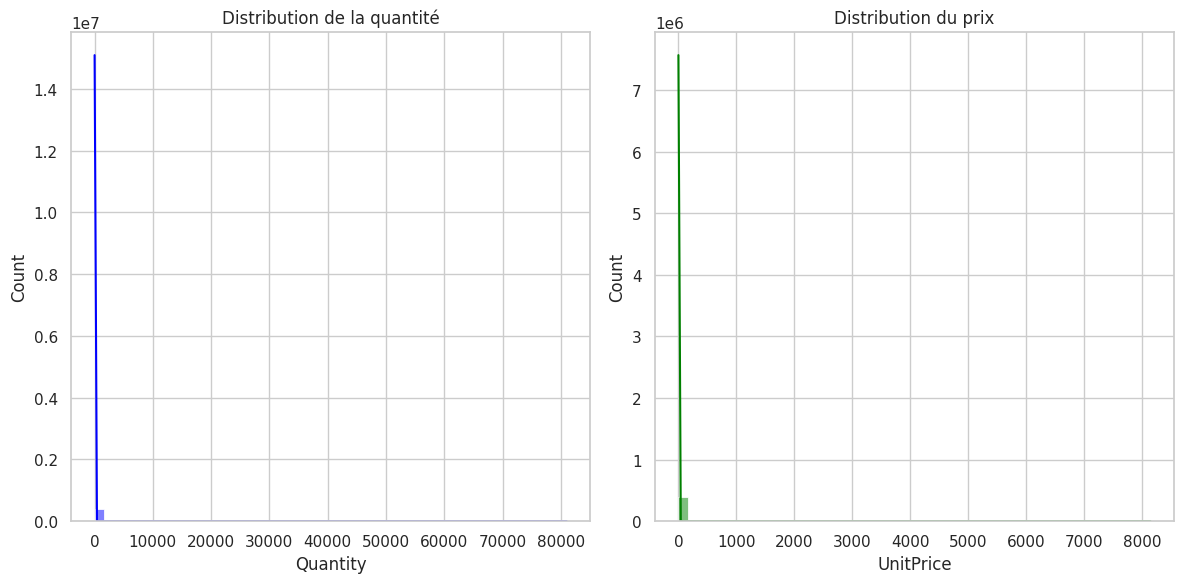

In [14]:
# Définir la taille et le style de graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Distribution de la colonne quantité
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution de la quantité')

# Distribution de la colonne prix
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['UnitPrice'], bins=50, kde=True, color='green')
plt.title('Distribution du prix')

plt.tight_layout()
plt.show()

## 📊 **Analyse exploratoire des ventes**
Nous analysons les ventes totales par produit et par pays, puis créons des visualisations pour identifier les produits les plus vendus et les pays générant le plus de chiffre d’affaires.

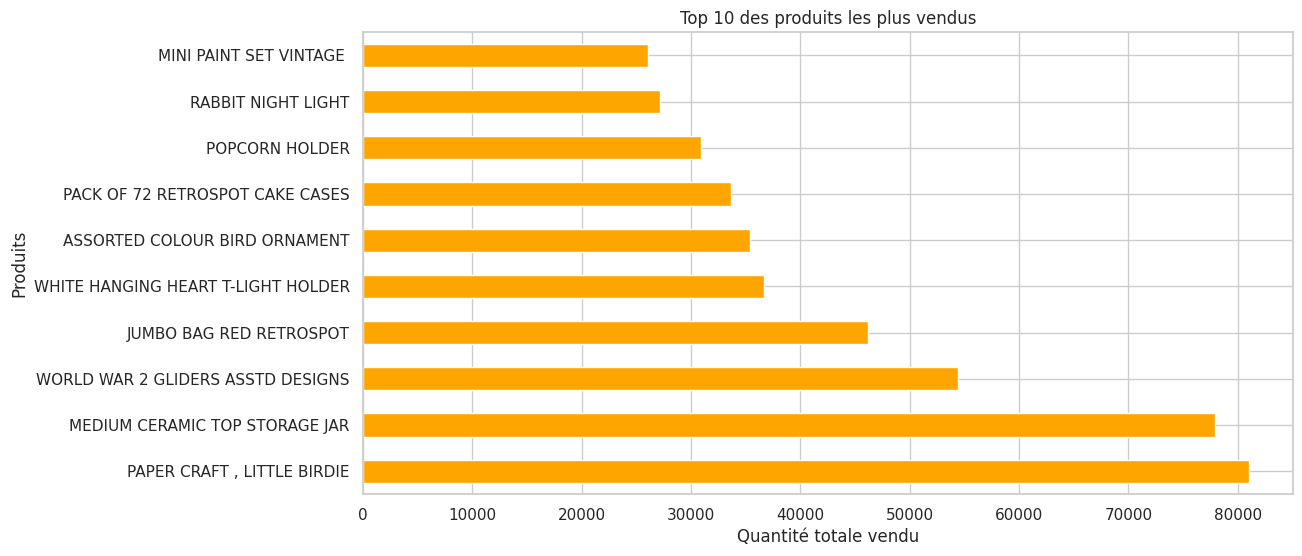

In [15]:
# Calculer les ventes totale par produits
produits_top = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualiser les produits les plus vendus
plt.figure(figsize=(12, 6))
produits_top.plot(kind='barh', color= 'orange')
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('Quantité totale vendu')
plt.ylabel('Produits')
plt.show()

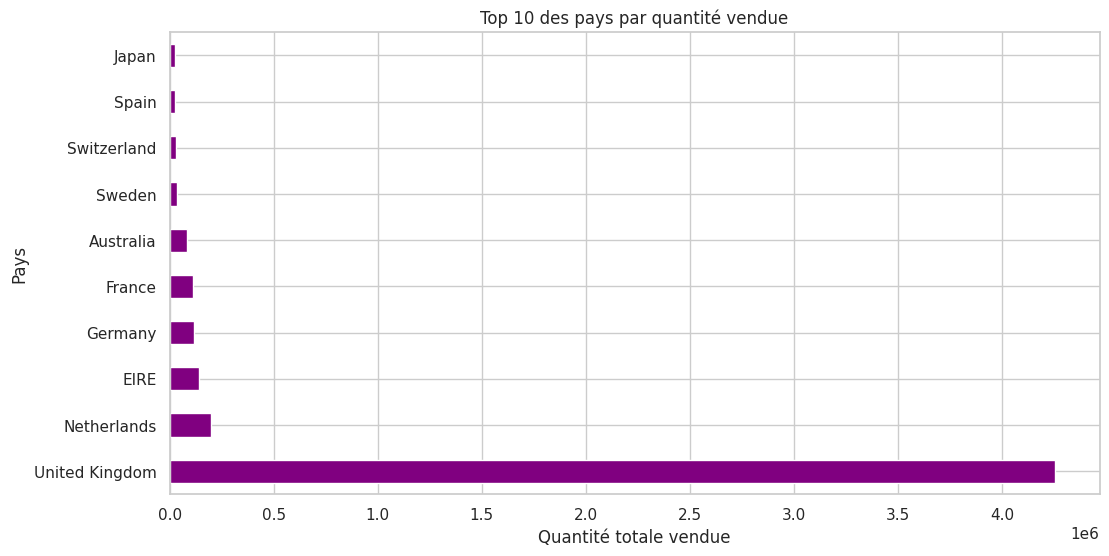

In [16]:
# calculer la vente totale par pays
pays_ventes = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualiser les ventes par pays
plt.figure(figsize=(12, 6))
pays_ventes.plot(kind='barh', color='purple')
plt.title('Top 10 des pays par quantité vendue')
plt.xlabel('Quantité totale vendue')
plt.ylabel('Pays')
plt.show()

## 🔬 **Analyse multivariée et statistiques**
Nous étudions la relation entre `Quantity` et `Price` :
- Matrice de corrélation
- Test de normalité (Shapiro-Wilk)
- Test de corrélation de Spearman
- Visualisation de la relation

           Quantity  UnitPrice
Quantity   1.000000  -0.004563
UnitPrice -0.004563   1.000000


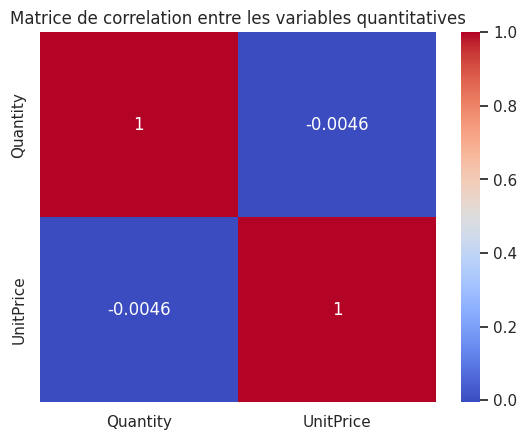

In [17]:
## Analyse multi-variés) | relation entre les variables quantitatives (Quanntity/Price)
# Matrice de corrélation
correlation_matrix = df_cleaned[['Quantity', 'UnitPrice']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de correlation entre les variables quantitatives")
plt.show()

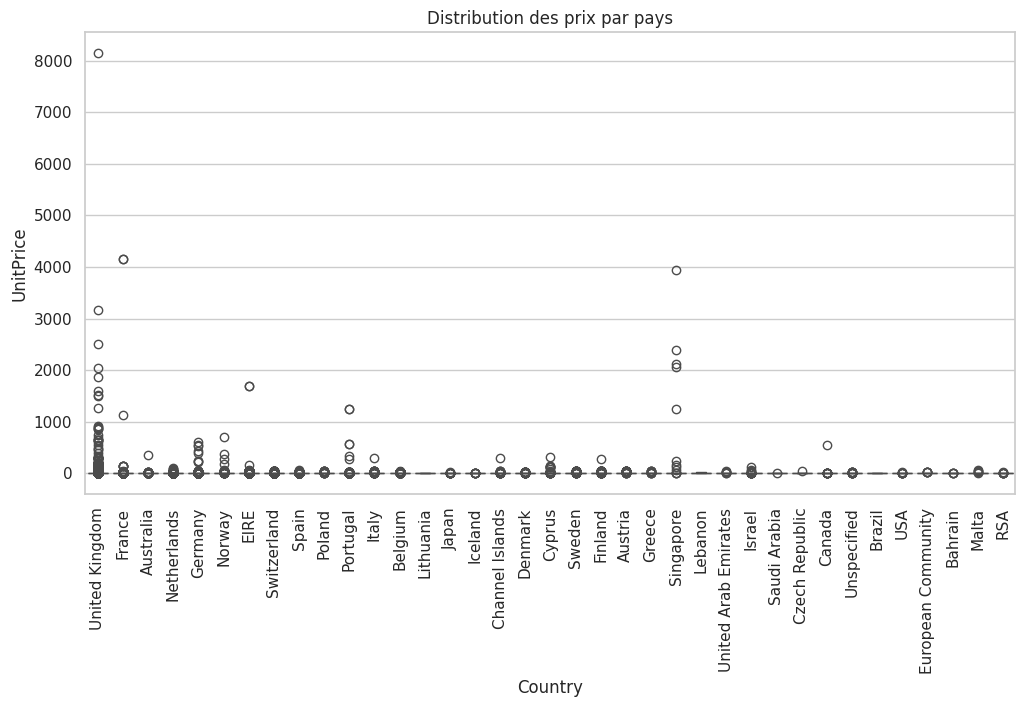

In [18]:
# Analyse des variables quantitatives et qualitatives
# Comparer les Price & Quantiity 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Distribution des prix par pays")
plt.show()

In [19]:
# Test de normalité des données
!pip install scipy


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [20]:
pip install statsmodels


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from scipy.stats import shapiro
import statsmodels.api as sm

In [22]:
# Test de normalité Shapiro
def test_normality(varialbe, data):
    stat, p_value = shapiro(data[varialbe])
    print(f"Test de shapiro-wilk pour {varialbe}:")
    print(f"Statistique du test: {stat: .4f}, p-valeur: {p_value:.4f}")

    if p_value >0.05:
        print(f"La variable '{varialbe}' suit une distribution normale (p > 0.05).\n")
    else:
        print(f"La variable '{varialbe}' ne suit pas une distribution normale (p <= 0.05).\n")    

In [23]:
# Test sur les variables quantitatives
test_normality('Quantity', df_cleaned)
test_normality('UnitPrice', df_cleaned)


Test de shapiro-wilk pour Quantity:
Statistique du test:  0.0127, p-valeur: 0.0000
La variable 'Quantity' ne suit pas une distribution normale (p <= 0.05).

Test de shapiro-wilk pour UnitPrice:
Statistique du test:  0.0252, p-valeur: 0.0000
La variable 'UnitPrice' ne suit pas une distribution normale (p <= 0.05).



/home/dipkley237/.pyenv/versions/3.10.12/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 397885.
  res = hypotest_fun_out(*samples, **kwds)


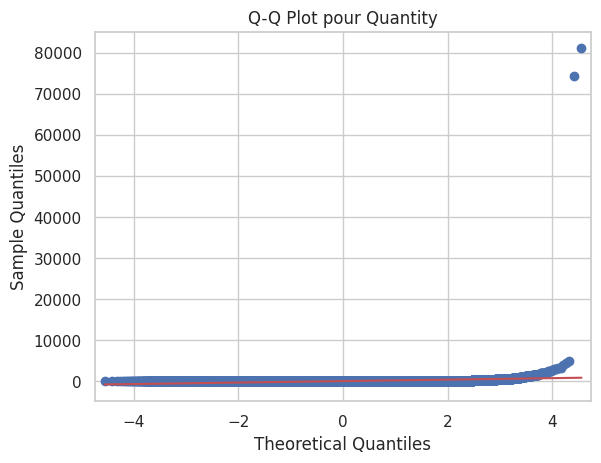

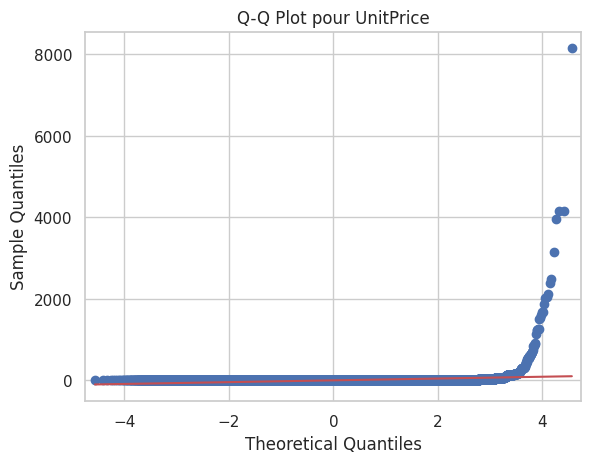

In [24]:
# Visualisation avec Q-Q plot
for variable in ['Quantity', 'UnitPrice']:
    sm.qqplot(df_cleaned[variable], line='s')
    plt.title(f"Q-Q Plot pour {variable}")
    plt.show()

In [25]:
# A la suite des résultats obtenue du test de normalité, nous allons effectuer un teste de corrélation de spearman
## Calculler la correlation de spearman entre 'Quantity' et 'Price'
from scipy.stats import spearmanr

In [26]:
# test de correlation de spearman en 'Quantity' et 'Price' 
coef, p_value = spearmanr(df_cleaned['Quantity'], df_cleaned['UnitPrice'])

# Affichage des résultats 
print(f"Test de correlation de spearman entre 'Quantity' et 'UnitPrice':")
print(f"coefficient de spearman : {coef:.4f}")
print(f"P_valeur : {p_value:.4f}")

Test de correlation de spearman entre 'Quantity' et 'UnitPrice':
coefficient de spearman : -0.4077
P_valeur : 0.0000


In [27]:
# interprétation des résultats 
if p_value < 0.05:
    print("Il existe une correlation significative entre 'Quantity' et 'UnitPrice'.")
else:
    print("Aucune correlation significative entre 'Quantity' et 'UnitPrice'.")

Il existe une correlation significative entre 'Quantity' et 'UnitPrice'.


In [28]:
# Visualisation complémentaire
import matplotlib.pyplot as plt

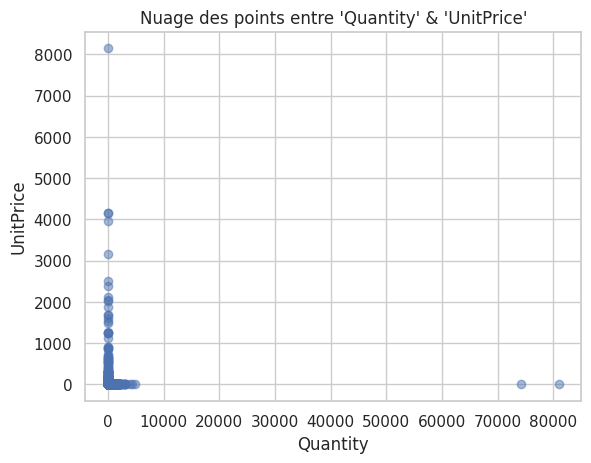

In [29]:
# Nuage de points entre quantity & price
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], alpha=0.5)
plt.title("Nuage des points entre 'Quantity' & 'UnitPrice'")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

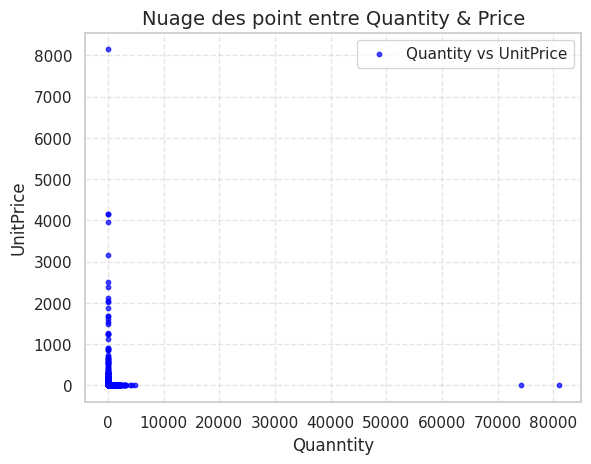

In [30]:
# Création d'un nuage de point avec des couleurs distintes
# Aguster la taille du graphique
plt.Figure(figsize=(8, 6))

# Ajouter les points Quantity et Price avec les couleurs distinctes
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], alpha=0.7, s=10, c='blue', label='Quantity vs UnitPrice')

# Personnalisation du graphique
plt.title("Nuage des point entre Quantity & Price", fontsize=14)
plt.xlabel("Quanntity", fontsize=12)
plt.ylabel("UnitPrice", fontsize=12)
plt.legend() # affiche une légende pour distinguer les couleurs
plt.grid(True, linestyle='--', alpha=0.5) # ajoute une grille légère 
plt.show()

In [31]:
# Test de corrélation entre variable quantitative 'Quantity' & 'Price' 
# Comme les données ne suivent pas une distribution normale (test de shapiro-wilk), nous allons utiliser le coef de correlation de spearman ou kandall (test adapté aux données non normales)
from scipy.stats import spearmanr, kendalltau

def test_correlation(variable1, variable2, method='spearman'):
    """
    Test de corrélation entre deux variables quantitatives.
    """
    if method == 'spearman':
        corr, p_value = spearmanr(variable1, variable2)
        method_name = "Spearman"
    elif method == 'kendall':
        corr, p_value = kendalltau(variable1, variable2)
        method_name = "Kendall"
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'spearman' ou 'kendall'.")
    
    print(f"Test de corrélation ({method_name}):")
    print(f"Coefficient de corrélation: {corr:.4f}, p-valeur: {p_value:.4f}")
    
    if p_value > 0.05:
        print("Conclusion : Pas de corrélation significative (p > 0.05).\n")
    else:
        print("Conclusion : Corrélation significative (p <= 0.05).\n")

# Appliquer le test
test_correlation(df_cleaned['Quantity'], df_cleaned['UnitPrice'], method='spearman')
test_correlation(df_cleaned['Quantity'], df_cleaned['UnitPrice'], method='kendall')


Test de corrélation (Spearman):
Coefficient de corrélation: -0.4077, p-valeur: 0.0000
Conclusion : Corrélation significative (p <= 0.05).

Test de corrélation (Kendall):
Coefficient de corrélation: -0.3106, p-valeur: 0.0000
Conclusion : Corrélation significative (p <= 0.05).



In [32]:
# analyse des variables catégoriel et quantitative
import scipy.stats as stats

# Statisque descriptives groupés
grouped_stats = df_cleaned.groupby('Country')['UnitPrice'].agg(['mean', 'median', 'std'])
print(grouped_stats)

                           mean  median         std
Country                                            
Australia              3.056261   1.790   10.386500
Austria                4.256030   1.950    7.380100
Bahrain                4.644118   2.950    3.673634
Belgium                3.630158   1.950    4.247654
Brazil                 4.456250   3.320    2.831727
Canada                 6.030331   1.650   44.713675
Channel Islands        4.531618   2.550   11.552776
Cyprus                 5.710391   2.950   18.577903
Czech Republic         3.130800   1.250    7.774781
Denmark                3.146184   1.950    3.787830
EIRE                   4.447109   2.100   28.764970
European Community     4.830000   3.150    4.412100
Finland                5.296993   2.080   13.489575
France                 4.417411   1.790   65.763560
Germany                3.709308   1.950   13.156619
Greece                 4.574414   2.100    7.616430
Iceland                2.644011   2.015    2.255381
Israel      

In [33]:
# Test Kruskal-Wallis (Si les données ne suivent pas une distribution normale)
stat, p_value = stats.kruskal(
    *[df_cleaned[df_cleaned['Country'] == country]['UnitPrice'] for country in df_cleaned['Country'].unique()]
)
print(f"Kruskal-Wallis test: Stat={stat:.4f}, p-value={p_value:.4f}")

Kruskal-Wallis test: Stat=857.2172, p-value=0.0000


Country
United Kingdom          354321
Germany                   9040
France                    8342
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


/tmp/ipykernel_4077/2158372495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df_cleaned, order=df_cleaned['Country'].value_counts().index, palette="viridis")


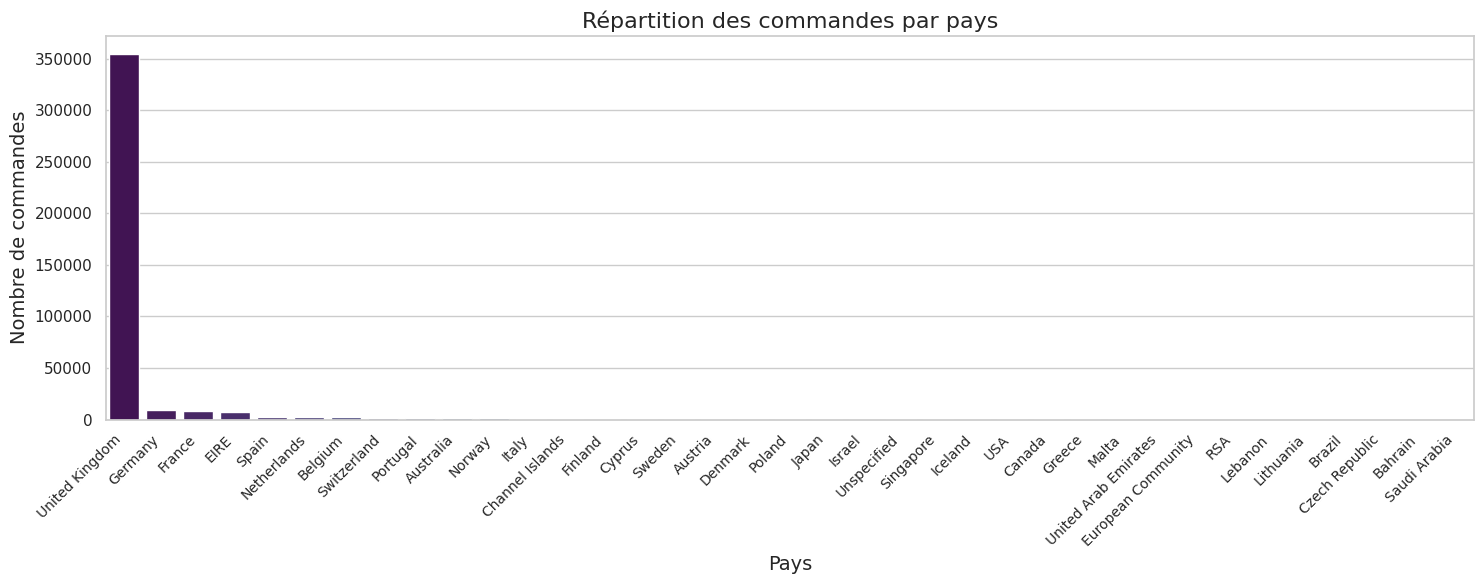

Chi-square test: Chi2=219086.6381, p-value=0.0000


In [34]:
# analyse des variable catégoriels
from scipy.stats import chi2_contingency

# Fréquences
Catégory_counts = df_cleaned['Country'].value_counts()
print(Catégory_counts)

# Countplot
plt.figure(figsize=(15, 6))  # Augmenter la taille de la figure
sns.countplot(x='Country', data=df_cleaned, order=df_cleaned['Country'].value_counts().index, palette="viridis")
plt.title('Répartition des commandes par pays', fontsize=16)
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Nombre de commandes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des noms des pays
plt.tight_layout()  # Ajuster automatiquement les marges
plt.show()

# Test du chi-carré (association entre deux variables catégoriques)
contingency_table = pd.crosstab(df_cleaned['Country'], df_cleaned['StockCode'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: Chi2={chi2:.4f}, p-value={p:.4f}")

In [35]:
import numpy as np

# Étape 1 : Identifier les colonnes non numériques
print("Types de données :\n", df_cleaned.dtypes)

# Conversion des colonnes pertinentes en numérique (par exemple, 'Quantity', 'UnitPrice')
for col in ['Quantity', 'UnitPrice']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Remplacer les erreurs par NaN

# Étape 2 : Supprimer les lignes contenant des valeurs non pertinentes
df = df.dropna(subset=['Quantity', 'UnitPrice'])

# Étape 3 : Calculer une colonne supplémentaire pour l'analyse : Montant total des ventes
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Étape 4 : Vérifier les corrélations entre les colonnes numériques
df_numeric = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

print("Matrice de corrélation :\n", correlation_matrix)

Types de données :
 ï»¿InvoiceNo            object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
dtype: object
Matrice de corrélation :
             Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.004563   -0.006232
UnitPrice  -0.004563   1.000000   -0.010875
CustomerID -0.006232  -0.010875    1.000000


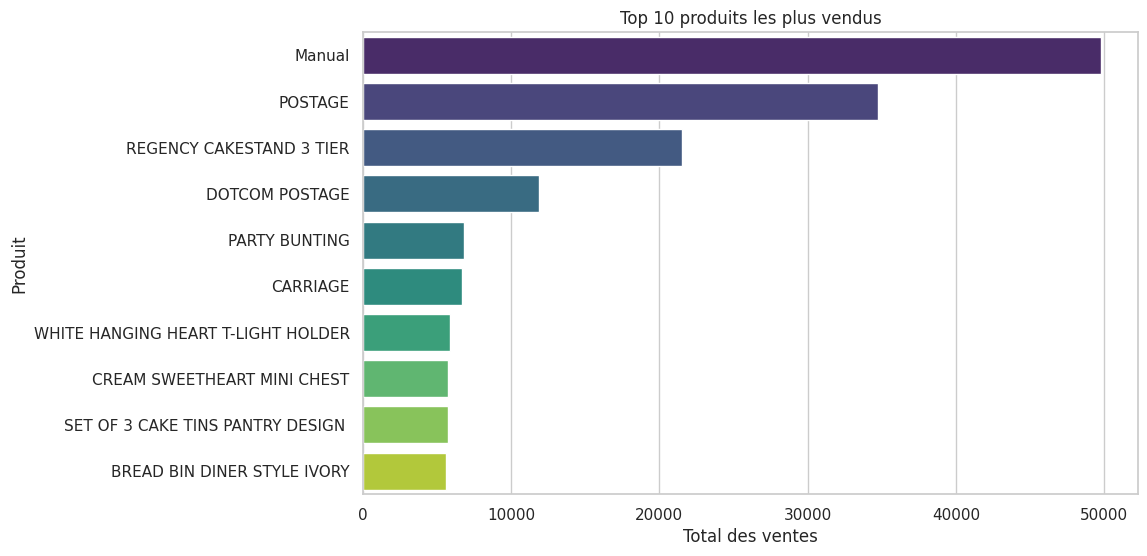

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 des produits les plus vendus
top_products = df_cleaned.groupby('Description')['UnitPrice'].sum().sort_values(ascending=False).head(10)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', dodge=False)
plt.title('Top 10 produits les plus vendus')
plt.xlabel('Total des ventes')
plt.ylabel('Produit')
plt.show()


In [37]:
# vérifions les types de colonnes dans le dataFrame
print(df_cleaned.dtypes)

ï»¿InvoiceNo            object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
dtype: object


In [38]:
# Sélectionner uniquement les colonnes numériques
numeric_colmns = df_cleaned.select_dtypes(include=['float64', 'Int64'])
print(numeric_colmns.columns) # Vérifier les colonnes numériques

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


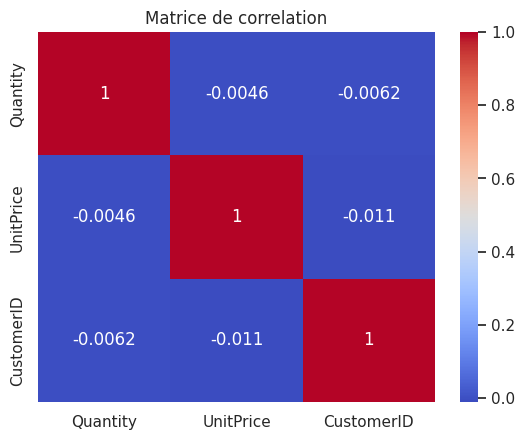

In [39]:
# Calculer la matrice de corrélation 
correlation_matrix = numeric_colmns.corr()

# Afficher la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation')
plt.show()

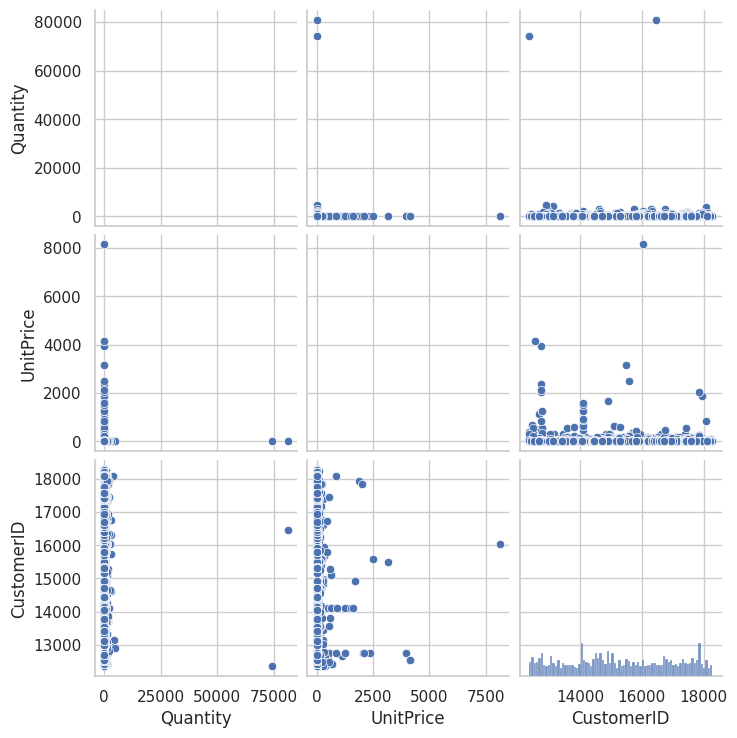

In [40]:
# Pairplot avec seulement les colonnes numériques
sns.pairplot(numeric_colmns)
plt.show()

In [41]:
# Vérifier les valeurs manquantes et les types
print(df_cleaned['UnitPrice'].isnull().sum())  # Nombre de valeurs manquantes
print(df_cleaned['UnitPrice'].dtype)  # Type de la colonne Price

# Filtrer les valeurs aberrantes (optionnel)
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]  # Exclure les prix négatifs ou nuls


0
float64


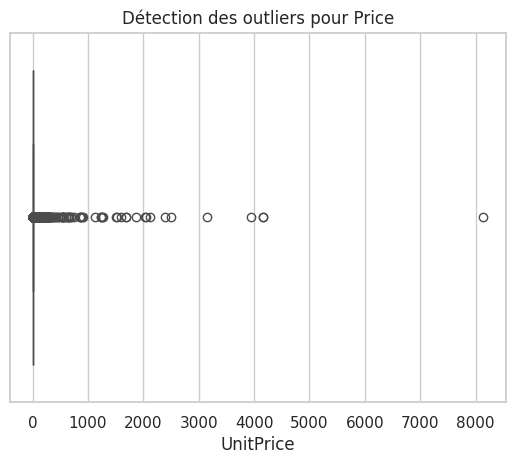

In [42]:
# Boxplot propre
sns.boxplot(x=df_cleaned['UnitPrice'])
plt.title('Détection des outliers pour Price')
plt.show()

## ✅ **Sauvegarde des données nettoyées**
Nous sauvegardons le dataset nettoyé pour l’utiliser dans Power BI.

In [43]:
# Exporter les données nettoyées 
df_cleaned.to_csv('online_retail_cleaned.csv', index=False, encoding='utf-8')
print("Fichier exporté avec succès !")

Fichier exporté avec succès !


## 📊 **Visualisation finale sous Power BI**
Les données nettoyées sont ensuite importées dans Power BI pour créer un dashboard interactif.

# 